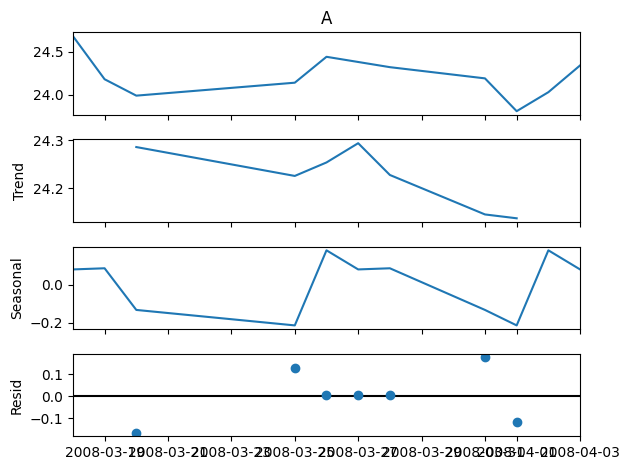

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("timeseries.csv", parse_dates=['Date'], index_col='Date')

value_column_name = df.columns[0]
period = 12
min_data_points = 2 * period
if len(df) < min_data_points:
    period = len(df) // 2
    if period < 1:
        print("Warning: Not enough data for seasonal decomposition. Skipping.")
        decomposition = None
    else:
        print(f"Warning: Adjusting period to {period} due to limited data.")
        decomposition = seasonal_decompose(df[value_column_name], model='additive', period=period)
else:

    decomposition = seasonal_decompose(df[value_column_name], model='additive', period=period)


if decomposition is not None:
    decomposition.plot()
    plt.show()
